## Making TF records from Solar Data Tutorial

In [1]:
# import necessary packages

#from __future__ import absolute_import, division, print_function
#import argparse
#import multiprocessing
import os
import sys
import numpy as np
#import pdb
from random import shuffle
import pandas as pd
import tensorflow as tf
from astropy.io import fits
from astropy.io.fits import getheader
import tensorflow as tf
from tf_util import example_util
import matplotlib.pylab as plt

In [2]:
# read in the HARPS data that has been shifted and is ready for being added to TF records

# set outfile to filename
# outfile = 'HARPS2.3.1_ready_for_TF_records.npz'
outfile = 'New_HARPS_ready_for_TF_records.npz'
org_file = 'HARPS2.3.1_ready_for_TF_records.npz'
# load the file
npzfile = np.load(outfile) 
onpzfile = np.load(org_file)

# List the column names in this file
npzfile.files

['BJD',
 'vrad_star',
 'og_ccf_list',
 'jup_shifted_CCF_data_list',
 'zero_shifted_CCF_list',
 'CCF_normalized_list',
 'cff_residual_list',
 'CCF_normalized_list_cutoff',
 'CCF_residual_list_cutoff',
 'ccf_residual_rescaled',
 'ccf_residual_rescaled_cutoff',
 'mu_og_list',
 'mu_jup_list',
 'mu_zero_list',
 'fwhm',
 'cont',
 'bis',
 'shift_by_rv']

In [ ]:
#for key in npzfile.files:
    # Access the array using the key and get its shape
#    print(f"Shape of {key}: {npzfile[key].shape}")

In [ ]:
len(npzfile['BJD'])

In [9]:
indices = np.where(onpzfile['BJD'] == 57232.4244183282)
indices

(array([], dtype=int64),)

In [ ]:
npzfile['CCF_residual_list_cutoff'][0]

In [ ]:
onpzfile['CCF_residual_list_cutoff'][1]

In [ ]:
npzfile['CCF_residual_list_cutoff'][0] - onpzfile['CCF_residual_list_cutoff'][1]

In [3]:
y_data = npzfile['ccf_residual_rescaled'][0]
y2_data = onpzfile['ccf_residual_rescaled'][1]
y3_data = y2_data - y_data

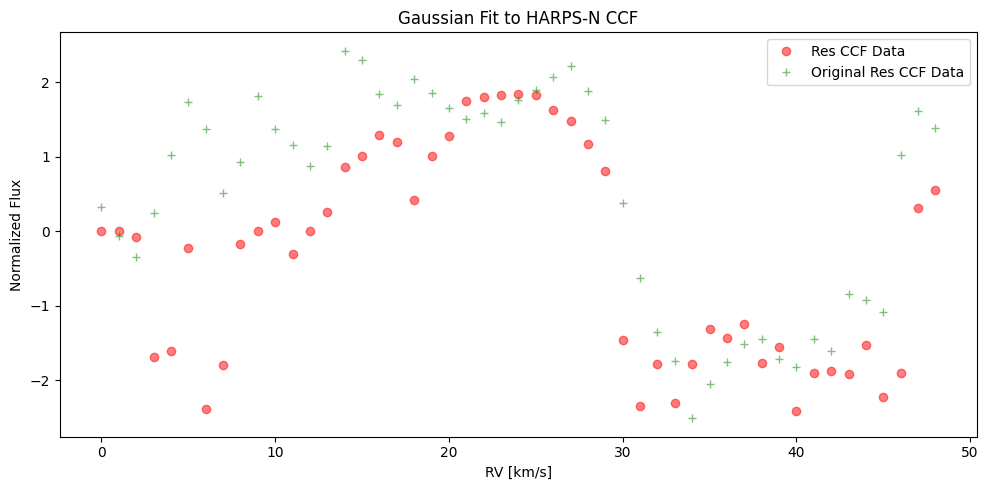

In [5]:

plt.figure(figsize=(10, 5))

# Plot Data
plt.plot(y_data, 'o', color='red', label='Res CCF Data', alpha=0.5)
plt.plot(y2_data, '+', color='green', label='Original Res CCF Data', alpha=0.5)
# plt.plot(y3_data, '*', color='blue', label='DIFF Res CCF Data', alpha=0.5)
# Plot Fitted Curve
# We generate a smoother x-axis for the line plot
# x_smooth = np.linspace(min(x_data), max(x_data), 1000)
# plt.plot(x_smooth, inverted_gaussian(x_smooth, *popt), 'k--', lw=2, label=f'Gaussian Fit (Center={fit_mean:.4f})')

plt.legend()
plt.xlabel("RV [km/s]")
plt.ylabel("Normalized Flux")
plt.title("Gaussian Fit to HARPS-N CCF")
plt.tight_layout()
plt.show()

In [5]:
from datetime import datetime, timedelta
def BJD2dates(date_values):
    """
    Accepts an array of float dates (JD or MJD), sorts them, 
    and prints the readable ISO format.
    """
    # Ensure input is a numpy array and sort it
    dates_arr = np.sort(np.array(date_values, dtype=np.float64))
    
    # MJD Epoch (November 17, 1858)
    epoch = datetime(1858, 11, 17)
    
    # Header for the output
    print(f"{'Original Value':<20} | {'Type':<5} | {'Readable Date (UTC/ISO)'}")
    print("-" * 60)
    
    for val in dates_arr:
        # Determine if the value is JD or MJD
        if val > 2400000:
            # Convert JD to MJD
            mjd_value = val - 2400000.5
            date_type = "JD"
        else:
            # Already MJD
            mjd_value = val
            date_type = "MJD"

        # Convert to datetime object
        # timedelta handles the fractional days (time) automatically
        readable_date = epoch + timedelta(days=float(mjd_value))
        
        # Print formatted row
        print(f"{val:<18.10f} | {date_type:<5} | {readable_date.isoformat()}")

In [8]:
BJD2dates(npzfile['BJD'])

Original Value       | Type  | Readable Date (UTC/ISO)
------------------------------------------------------------
57232.4244183282   | MJD   | 2015-07-29T10:11:09.743553
57282.4641876048   | MJD   | 2015-09-17T11:08:25.809055
57476.4140912891   | MJD   | 2016-03-29T09:56:17.487377
57819.4185927224   | MJD   | 2017-03-07T10:02:46.411219
57978.6210300725   | MJD   | 2017-08-13T14:54:16.998268


In [ ]:
BJD2dates(onpzfile['BJD'])

## Try adding a new feature now :)